In [152]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import math
import csv
from pandas import DataFrame

##### you can find the dataset here: https://grouplens.org/datasets/movielens/100k/
data=np.genfromtxt('data/u.data',delimiter='\t')

uID=data[:,][:,0]     # first column
mID=data[:,][:,1]     # second column
rating=data[:,][:,2]  #third column
time=data[:,][:,3]

### number of rows(users), columns(movies) and variety of ratings given by users
MIN_uID=int(min(uID))
MAX_uID=int(max(uID))

MIN_mID=int(min(mID))
MAX_mID=int(max(mID))

MIN_rating=min(rating)
MAX_rating=max(rating)

print('User length:',len(uID))

print ('Num of Users: ',MIN_uID,' to ',MAX_uID, '\nNum of Movies: ',MIN_mID,' to ',MAX_mID,'\nRange of ratings given by users: ',MIN_rating, ' to ',MAX_rating)
rating_Variety=np.unique(rating)
print ('Variety of ratings given by users are: ', rating_Variety)

User length: 100000
Num of Users:  1  to  943 
Num of Movies:  1  to  1682 
Range of ratings given by users:  1.0  to  5.0
Variety of ratings given by users are:  [1. 2. 3. 4. 5.]


In [153]:
##### Raing Matrix
Init_Mat=pd.DataFrame(data=data,index=range(len(data)),columns=['uID','mID','rating','time'])  ##making a dataFrame with columns:['uID','mID','rating']
Init_Mat=Init_Mat.sort_values(by=['uID','mID'])
Init_Matrix=np.array(Init_Mat) #making array
print ('\nA head of array of initial matrix with columns:[uID,mID,rating]:\n',Init_Mat.head())
print('\n---for example:---\nInit_Matrix[1][2] is: ',Init_Matrix[1][2],'\n   means:the data in row 2 column 3')  #data in row 2 column 3
Rating_Matrix=np.zeros((len(np.unique(uID)),len(np.unique(mID))),float)

i=iter(Init_Matrix)

for j in range(len(Init_Matrix)):
    n=next(i)
    x=int(n[0])
    y=int(n[1])
    Rating_Matrix[x-1][y-1]=n[2]
       

print('\n*** the Rating_Matrix len:***\n',len(Rating_Matrix))        
print('\n*** the Rating_Matrix is:***\n',Rating_Matrix)
2


A head of array of initial matrix with columns:[uID,mID,rating]:
        uID  mID  rating         time
32236  1.0  1.0     5.0  874965758.0
23171  1.0  2.0     3.0  876893171.0
83307  1.0  3.0     4.0  878542960.0
62631  1.0  4.0     3.0  876893119.0
47638  1.0  5.0     3.0  889751712.0

---for example:---
Init_Matrix[1][2] is:  3.0 
   means:the data in row 2 column 3

*** the Rating_Matrix len:***
 943

*** the Rating_Matrix is:***
 [[5. 3. 4. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [5. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 5. 0. ... 0. 0. 0.]]


2

In [154]:
import numpy as np
from scipy.stats import weibull_min
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


# Flatten the matrix into a 1D array of ratings, excluding zeros
data = Rating_Matrix.flatten()
data = data[data != 0]

# Filter out nan and inf values from the data array
data = data[np.isfinite(data)]

# Filter out any rating values that are greater than 5
data = data[data <= 5]

# Sort the data in ascending order
data = np.sort(data)

# Define the function to fit a Weibull distribution
def weibull_pdf(x, alpha, beta, center):
    return (beta / alpha) * ((x - center) / alpha)**(beta - 1) * np.exp(-((x - center) / alpha)**beta)

# Create the x values to be used for fitting
x = np.linspace(1, 5, len(data))

# Fit a Weibull distribution to the data
p0 = [1, 1, 3]
bounds = ([0, -np.inf, 0], np.inf)
maxfev = 10000
params, cov = curve_fit(weibull_pdf, x, data, p0=p0, bounds=bounds, maxfev=maxfev)

# Print the estimated parameters
print(f"alpha = {params[0]}, beta = {params[1]}, center = {params[2]}")

# Create a histogram of the ratings
fig, ax = plt.subplots()
ax.hist(data, bins=5, range=(1, 5), align="left", edgecolor="black", density=True)
ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xlabel("Rating")
ax.set_ylabel("Frequency")
ax.set_title("Movie Rating Distribution")

# Plot the fitted Weibull distribution
y = weibull_pdf(x, *params)
ax.plot(x, y, 'r--', label='Fitted Weibull distribution')

# Add a legend and show the plot
ax.legend()
fig.tight_layout()
plt.show()



C:\Users\User\AppData\Local\Temp\ipykernel_16596\457017524.py:22: RuntimeWarning: invalid value encountered in power
  return (beta / alpha) * ((x - center) / alpha)**(beta - 1) * np.exp(-((x - center) / alpha)**beta)


ValueError: array must not contain infs or NaNs

In [145]:
print("Data:", mdata)
print("Sorted data:", np.sort(mdata))

Data: [1.96000000e+02 2.42000000e+02 3.00000000e+00 ... 2.03000000e+02
 3.00000000e+00 8.79959583e+08]
Sorted data: [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 8.93286638e+08
 8.93286638e+08 8.93286638e+08]


In [55]:
%store Cr

Stored 'Cr' (list)


In [56]:
print(Cr[0], Cr[1])

0.8816891585828713 0.9188709434407597


In [112]:
import numpy as np
from scipy.stats import weibull_min, ks_2samp


# Generate the global Weibull distribution
center = 4.1 # 3.97 good
global_dist = weibull_min.rvs(2, loc=center, size=10000)

# Calculate the Weibull distribution parameters for each user's rating data
'''
alpha = []
beta = []
for i in range(len(Rating_Matrix)):
    x = Rating_Matrix[i][np.nonzero(Rating_Matrix[i])]
    if len(x) > 0:
        alpha_i, beta_i, loc_i = weibull_min.fit(x)
        alpha.append(alpha_i)
        beta.append(beta_i)
    else:
        alpha.append(np.nan)
        beta.append(np.nan)
'''

# Calculate the Kolmogorov-Smirnov statistic and p-value for each user's rating distribution
Cr = []
for i in range(len(Rating_Matrix)):
    x = Rating_Matrix[i][np.nonzero(Rating_Matrix[i])]
    ks_stat, p_value = ks_2samp(x, global_dist)
    Cr.append(ks_stat)

# Print the resulting distribution parameters and credibility values
#for i in range(len(Rating_Matrix)):
#    print(f"User {i}: alpha = {alpha[i]}, beta = {beta[i]}, Cr = {Cr[i]}")
%store Cr


Stored 'Cr' (list)


In [110]:
import numpy as np
from scipy.stats import weibull_min, ks_2samp

# generate the global Weibull distribution
center = 3.8 #3.97
global_dist = weibull_min.rvs(2, loc=center, size=10000)

# calculate the Kolmogorov-Smirnov statistic and p-value for each user's rating distribution
Cr = []
for i in range(len(Rating_Matrix)):
    a = Rating_Matrix[i]
    x = a[np.nonzero(a)]
    ks_stat, p_value = ks_2samp(x, global_dist)
    Cr.append(ks_stat)

# print the credibility values
#print(Cr)


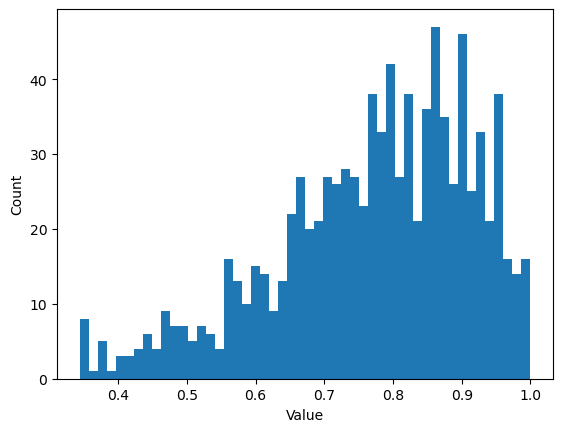

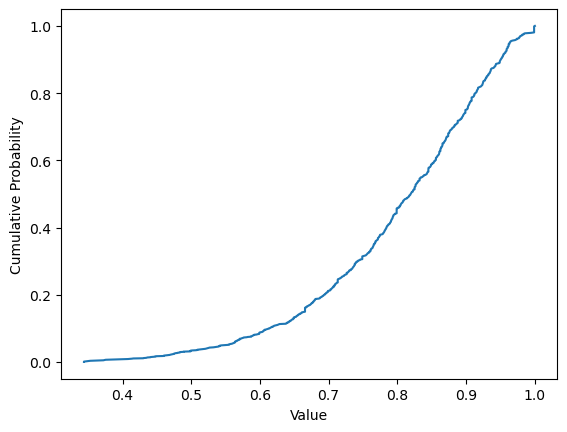

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# generate a series of random numbers
series = Cr #np.random.normal(0, 1, size=1000)

# plot a histogram of the series
fig, ax = plt.subplots()
ax.hist(series, bins=50)
ax.set_xlabel('Value')
ax.set_ylabel('Count')
plt.show()

series = np.array(series)
# calculate the cumulative distribution function
cdf = np.cumsum(np.sort(series)) / series.sum()

# plot the cumulative distribution function
fig, ax = plt.subplots()
ax.plot(np.sort(series), cdf)
ax.set_xlabel('Value')
ax.set_ylabel('Cumulative Probability')
plt.show()

In [107]:
%store Cr


Stored 'Cr' (list)


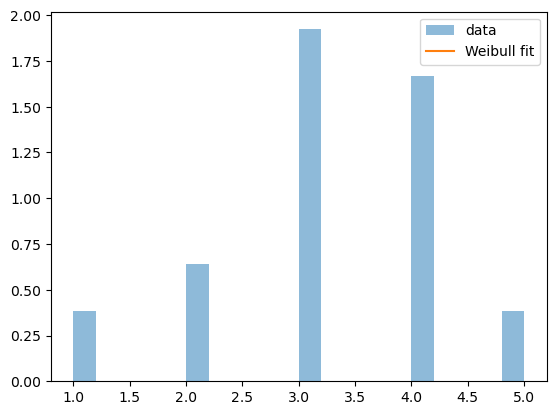

In [11]:
import numpy as np
from scipy.stats import weibull_min
import matplotlib.pyplot as plt

# assume Rating_Matrix is a numpy array containing user ratings, with each row representing a user and each column representing an item
# plot the Weibull distribution for item 0
x = Rating_Matrix[:, 15]
x = x[np.nonzero(x)]
if len(x) > 0:
    alpha, beta, loc = weibull_min.fit(x)
    plt.hist(x, bins=20, density=True, alpha=0.5, label='data')
    x_range = np.linspace(min(x), max(x), 100)
    plt.plot(x_range, weibull_min.pdf(x_range, alpha, loc, beta), label='Weibull fit')
    plt.legend()
    plt.show()
else:
    print("No ratings for item 0.")

